<a href="https://colab.research.google.com/github/manelbenabid/Lebanese-Arabizi-Tweet-Sentiment-Analysis/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/manelbenabid/Lebanese-Arabizi-Tweet-Sentiment-Analysis.git

Cloning into 'Lebanese-Arabizi-Tweet-Sentiment-Analysis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 281.33 KiB | 4.85 MiB/s, done.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/manelbenabid/Lebanese-Arabizi-Tweet-Sentiment-Analysis/main/data/arabizi_tweets.csv")

In [11]:
df.head(10)

,tweet,sentiment,highlight
0,Aw enn l ahla men hek hay li btelbesle crop to...,Negative,None
1,yu2brnee jamelo pepe happy_face_smiley tfeh sh...,Negative,None
2,Lea ktir pedophile happy_face_smiley,Negative,Bullying
3,Shu hal hmar hayda,Negative,Bullying
4,Fasharet 3a ra2btak w ra2bit m3almak w ra2bit ...,Negative,None
5,Hayda ensen marid,Negative,None
6,my uncle is lowkey aawne w ktir aabele natfo,Negative,None
7,Bassam bte7lam feyon lal syesye bel leil as a ...,Negative,Sarcasm
8,@Ritarouhana helo ktir. Eza badkoun tejo kelko...,Negative,Sarcasm
9,Hayda ma biya3ref ye2ra w yektob w bedo wazire...,Negative,None


In [ ]:
# convert sentiment to binary class [0,1]
df['class'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})

In [ ]:
df.tail(5)

,tweet,sentiment,highlight,class
1173,@ClementHakim helo el tafe2ol happy_face_smile...,Positive,None,1
1174,lah helo short hair,Positive,Courtesy words,1
1175,ya allah enta w batnak hahahaha,Positive,Joke,1
1176,-malla a7lam ya zalame -eh man sa2ile ktir - l...,Positive,Joke,1
1177,W yimkin chi nhar u3a mn l nom la2i hadi bel f...,Positive,Joke,1


array([[<Axes: title={'center': 'class'}>]], dtype=object)

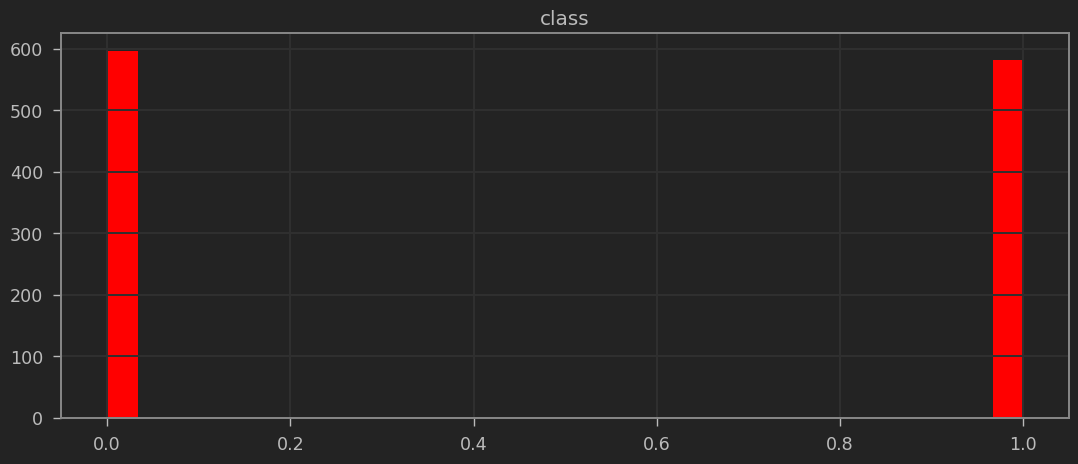

In [ ]:
# Plot the histogram
df.hist(bins=30, figsize=(13,5), color='red')

In [ ]:
df.sentiment.value_counts()

Negative    596
Positive    582
Name: sentiment, dtype: int64

<Axes: xlabel='class', ylabel='count'>

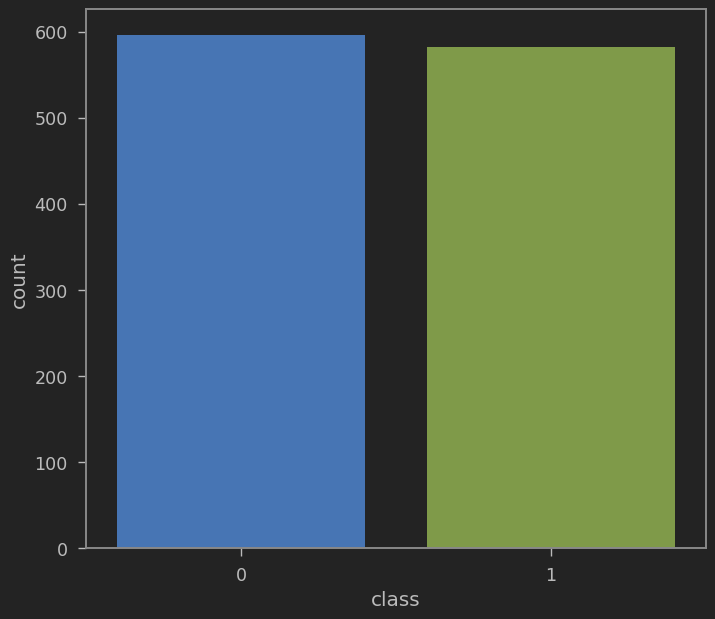

In [ ]:
sns.countplot(df, x="class")

In [ ]:
# Let's get the length of the messages
df['length'] = df['tweet'].apply(len)
df.head(10)

,tweet,sentiment,highlight,class,length
0,Aw enn l ahla men hek hay li btelbesle crop to...,Negative,None,0,135
1,yu2brnee jamelo pepe happy_face_smiley tfeh sh...,Negative,None,0,89
2,Lea ktir pedophile happy_face_smiley,Negative,Bullying,0,36
3,Shu hal hmar hayda,Negative,Bullying,0,18
4,Fasharet 3a ra2btak w ra2bit m3almak w ra2bit ...,Negative,None,0,58
5,Hayda ensen marid,Negative,None,0,17
6,my uncle is lowkey aawne w ktir aabele natfo,Negative,None,0,44
7,Bassam bte7lam feyon lal syesye bel leil as a ...,Negative,Sarcasm,0,74
8,@Ritarouhana helo ktir. Eza badkoun tejo kelko...,Negative,Sarcasm,0,154
9,Hayda ma biya3ref ye2ra w yektob w bedo wazire...,Negative,None,0,85


In [ ]:
df.describe()

,class,length
count,1178.000000,1178.000000
mean,0.494058,68.928693
std,0.500177,47.071377
min,0.000000,4.000000
25%,0.000000,36.000000
50%,0.000000,60.000000
75%,1.000000,90.000000
max,1.000000,620.000000


In [ ]:
# Let's view the shortest tweet
df[df['length'] == 4]['tweet']

1127    Atel
Name: tweet, dtype: object

# Data Preprocessing

1. convert to lower-case
1. remove punctuation, mentions, URLs, numbers, measurements, and timings
1. remove stop words

In [ ]:
import re

def remove_tags_hashtags_url(tweet):
    # Remove hashtags (words starting with #)
    tweet = re.sub(r'#\w+', '', tweet)

    # Remove mentions (words starting with @)
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove URLs (using a regular expression to match common URL patterns)
    tweet = re.sub(r'http[s]?://\S+', '', tweet)

    # Remove extra spaces and trim the tweet
    tweet = ' '.join(tweet.split())

    return tweet

In [ ]:
tweet = df['tweet'][266]
print(tweet)
clean_tweet = remove_tags_hashtags_url(tweet)
print(clean_tweet)

Hahahhahaha albo melyen menna ðŸ¤£ https://www.facebook.com/723616625/posts/10156414568561626/
Hahahhahaha albo melyen menna ðŸ¤£


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk # Natural Language tool kit
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
stopwords.words('french')

In [ ]:
arabizi_stopwords = ['chu', 'chou', 'hal', 'chou', 'fikeee', 'eh', 'ma', '3a', '3am', '3an', '3ana', '3endon', '3m', 'aal', '3al','3ala','al', 'ana',
                 'b', 'bas', 'bass', 'bel', 'bi', 'chi', 'el', 'ele', 'enn', 'enno', 'eno', 'mch', '3layki', '3layon',
                 'enta', 'enteh','ente', 'eza', 'fi', 'fik', 'fina', 'fine', 'fiya', 'fiye', 'wlik', 'shi',
                 'hal', 'hayda', 'hek', 'inta', 'iza', 'kaza', 'kel', 'kente', 'kif',
                 'kint', 'kinte', 'l',  'la2na', 'lal', 'li', 'ma3', 'ma3a', 'ma3ak',
                 'ma3e', 'ma3ekk', 'ma3i', 'ma3ik', 'ma3ke', 'ma3na', 'ma3o', 'men', 'mn',
                 'n7na', 'shu', 'tab', 'tayeb', 'w', 'aw', 'wlek', 'ya', 'ya3ne', 'yala', 'yalle']

In [ ]:
def remove_punction_stop_words(tweet):
    Test_punc_removed = [char for char in tweet if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean_eng = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_eng = ' '.join(Test_punc_removed_join_clean_eng)
    Test_punc_removed_join_clean_fr = [word for word in Test_punc_removed_join_eng.split() if word.lower() not in stopwords.words('french')]
    Test_punc_removed_join_fr = ' '.join(Test_punc_removed_join_clean_fr)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join_fr.split() if word.lower() not in arabizi_stopwords]
    return Test_punc_removed_join_clean

In [ ]:
df['tweet'][0]

'Aw enn l ahla men hek hay li btelbesle crop top b noss din l sa23a w l talej w bte23ad tne2 "Msa23a" "Ya alla ktir sa23a" N2ebre lbese.'

In [ ]:
clean_tweet = remove_punction_stop_words(df['tweet'][0])
clean_tweet

['ahla',
 'hay',
 'btelbesle',
 'crop',
 'top',
 'noss',
 'din',
 'sa23a',
 'talej',
 'bte23ad',
 'tne2',
 'Msa23a',
 'alla',
 'ktir',
 'sa23a',
 'N2ebre',
 'lbese']

In [ ]:
def sound_effects(tweet):
    # substitute laughter sound effect
    tweet = re.sub(r'(hahah*)+', 'laughter', tweet)
    tweet = re.sub(r'(hihih*)+', 'laughter', tweet)
    tweet = re.sub(r'(heheh*)+', 'laughter', tweet)
    tweet = re.sub(r'waha(ha)+', 'laughter', tweet)
    tweet = re.sub(r'(loo*l*)+', 'laughter', tweet)

    # substitute amazement
    tweet = re.sub(r'(y+a+)+y+', 'amazement', tweet)
    tweet = re.sub(r'(w+o+)+w+', 'amazement', tweet)
    tweet = re.sub(r'(w+a+)+w+', 'amazement', tweet)

    # substitute surprise
    tweet = re.sub(r'o+h+', 'surprise', tweet)
    tweet = re.sub(r'a+h+', 'surprise', tweet)
    tweet = re.sub(r'o+w+', 'surprise', tweet)


    # Remove extra spaces and trim the tweet
    tweet = ' '.join(tweet.split())

    return tweet

# Plot the word Cloud

In [ ]:
positive = df[df['class']==1]
positive.head(10)

,tweet,sentiment,highlight,class,length
596,@GhidaThiniFawaz mwal3eta ween ma ken Twitter ...,Positive,None,1,79
597,Kazem el saher ahla w ahdam w aklas 3alam #MBC...,Positive,None,1,67
598,Ya wayle chu helo l goal #france #spain @Karim...,Positive,None,1,70
599,Ya allah ayshek queen,Positive,None,1,21
600,Bhbak,Positive,None,1,5
601,La2 helo ktir l shab !!!! #ctrop #ctrop,Positive,None,1,39
602,@hiba_khalil1 hahaha tb ma howe ktr helo w hek...,Positive,None,1,71
603,Fi kteer wjouh helwe 3a twitter lyom allah yeh...,Positive,None,1,51
604,Wel3aani with ma3 3aylet #Alama 🔥 happy_face_s...,Positive,None,1,263
605,@Marwakkari @tmclebanon merci Madame!! Chta2ne...,Positive,Courtesy words,1,74


In [ ]:
negative = df[df['class']==0]
negative

,tweet,sentiment,highlight,class,length
0,Aw enn l ahla men hek hay li btelbesle crop to...,Negative,None,0,135
1,yu2brnee jamelo pepe happy_face_smiley tfeh sh...,Negative,None,0,89
2,Lea ktir pedophile happy_face_smiley,Negative,Bullying,0,36
3,Shu hal hmar hayda,Negative,Bullying,0,18
4,Fasharet 3a ra2btak w ra2bit m3almak w ra2bit ...,Negative,None,0,58
...,...,...,...,...,...
591,tlo3et bel booster mnih ma 3melet sakte albie,Negative,None,0,45
592,ktir sara333!! Kel el wa2et ide 3a albe,Negative,None,0,39
593,ok maybe ktir 3am khaffe2 bas eno 3al alile ja...,Negative,None,0,63
594,meto kel el pupies frown_sad_angry_pouting,Negative,None,0,42


In [ ]:
sentences = df['tweet'].tolist()
len(sentences)

1178

In [ ]:
sentences_as_one_string =" ".join(sentences)

In [ ]:
!pip install wordcloud

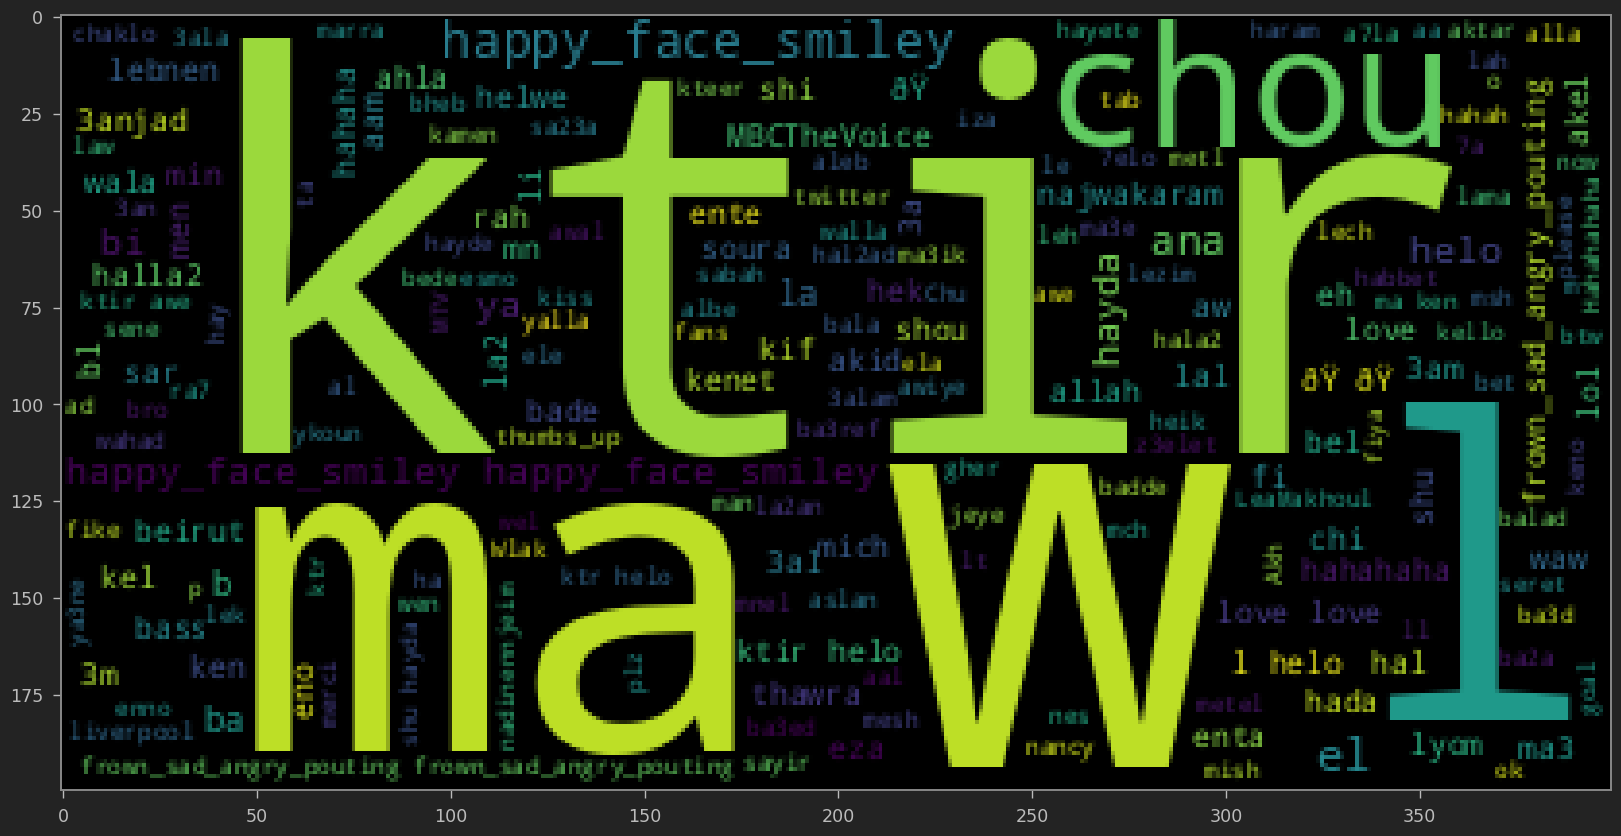

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

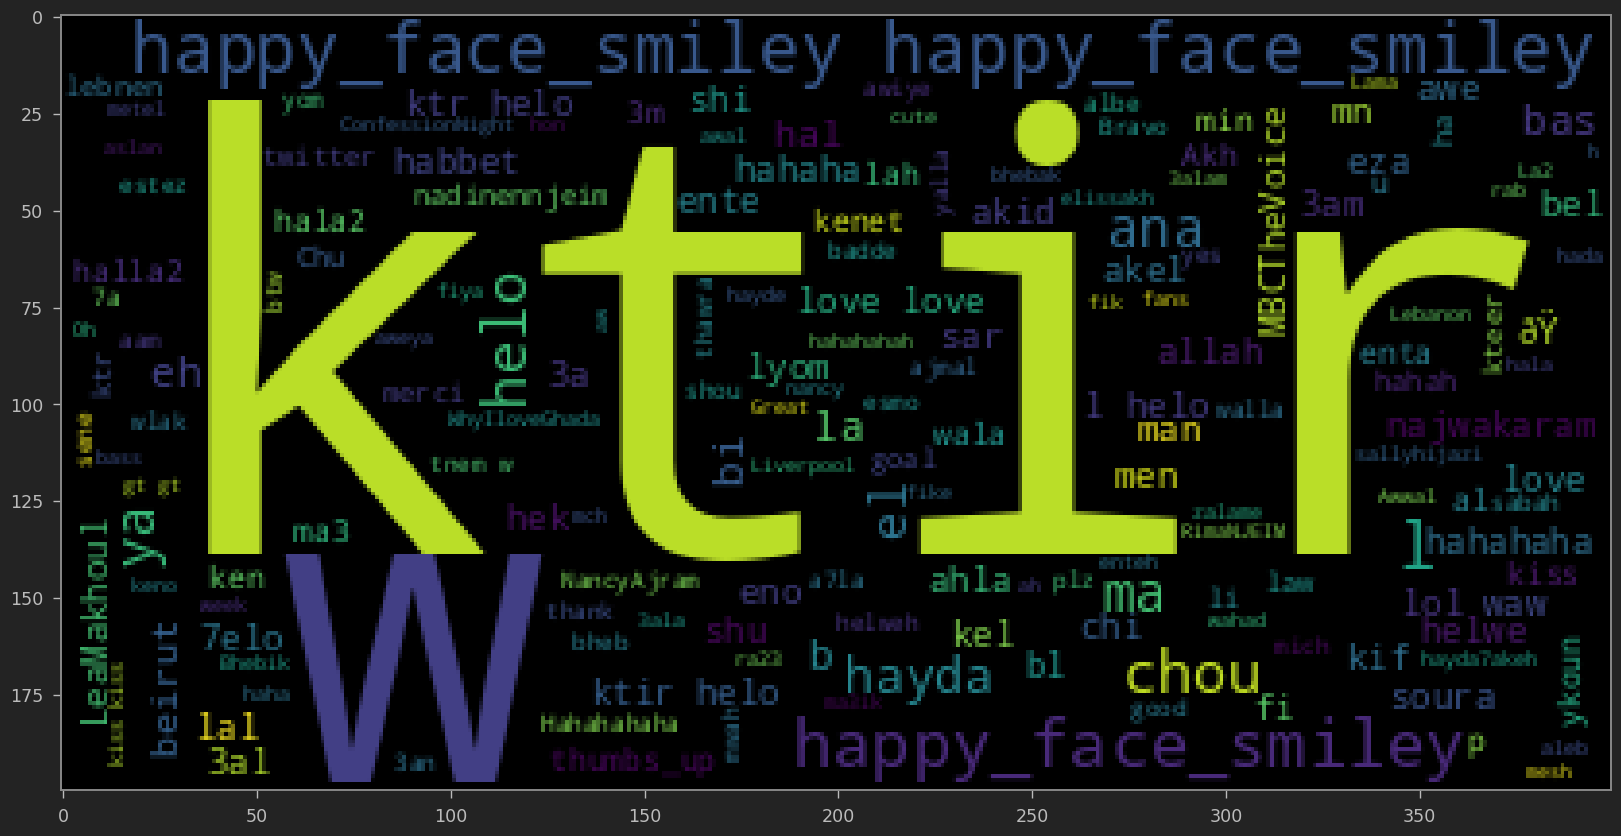

In [ ]:
pos_sentences = positive['tweet'].tolist()
pos_sentences_as_one_string =" ".join(pos_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_sentences_as_one_string))

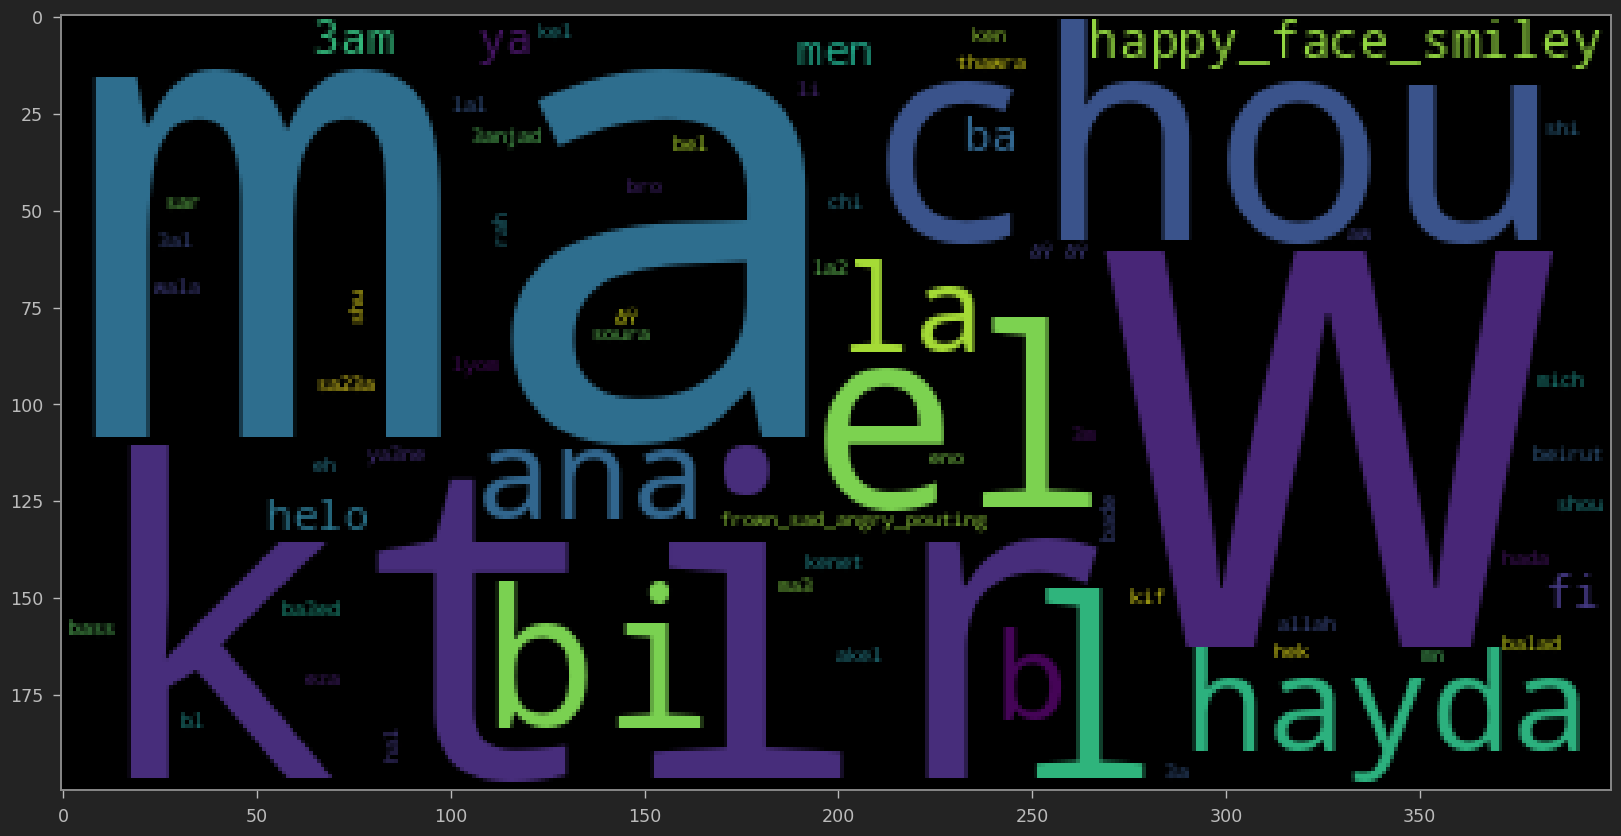

In [ ]:
neg_sentences = negative['tweet'].tolist()
neg_sentences_as_one_string =" ".join(neg_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentences_as_one_string))